# Exercises
Within your codeup-data-science directory, create a new directory named classification-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub. Make sure to add a .gitignore file. In your .gitignore, ignore .DS_Store, .ipynb_checkpoints/, __pycache__, titanic.csv, iris.csv, and env.py. Add and commit your .gitignore file before moving forward.

The end product of this exercise is a jupyter notebook (classification_exercises.ipynb) and acquire.py. The notebook will contain all your work as you move through the exercises. The acquire.py file should contain the final functions.

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

# import acquire.py 
import acquire

#import prepare.py
import prepare

1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?


In [ ]:
#Creating pandas dataframe
df_iris= data('iris')

In [ ]:
type(df_iris)

In [ ]:
df_iris.head(3) # print first 3 rows

In [ ]:
#Print shape (rows, columns)
df_iris.shape

In [ ]:
# print datatypes for each column

df_iris.info()

In [ ]:
# Print summary of statistics
df_iris.describe()

In [ ]:
#Recommend rescaling?
# Take away from this question at this point,
# is that the Iris data continuous values are all using the same unit of measure, and 
# there is not a huge range in the values, so you really don’t need to worry about scaling the data.

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.



In [ ]:
cust_df = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

cust_df.head()

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample= cust_df.head(100)

df_excel_sample

In [ ]:
# print the number of rows of your original dataframe

cust_df.shape

In [ ]:
# print the first 5 column names

cust_df.columns[:5]

In [ ]:
cust_df.info()

In [ ]:
# print the column names that have a data type of object
cust_df.select_dtypes(['object']).columns

In [ ]:
#To print columns that are NOT objects
cust_df.select_dtypes(exclude= ['object']).columns

In [ ]:
#compute the range for each of the numeric variables.
cust_df.select_dtypes(include= 'number').max() - cust_df.select_dtypes(include= 'number').min()



3. Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [ ]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
# Read the data from this google sheet into a dataframe, df_google
df_google = pd.read_csv(csv_export_url)

In [ ]:
# print the first 3 rows
df_google.head(3)

In [ ]:
#print the number of rows and columns
df_google.shape

In [ ]:
# print the column names
df_google.columns

In [ ]:
#To print all the column names as a list, looks cleaner
df_google.columns.to_list()

In [ ]:
# print the data type of each column
df_google.info()

In [ ]:
#Looking at all unique values, all single-digits are categorical
unique_val= df_google.nunique()

unique_val

In [ ]:
#print the unique values for each of your categorical variables
df_google['Survived'].value_counts(dropna=False)


Note: dropna does not drop nulls permanently, this allows for nulls to not be included in count

In [ ]:
# print the unique values for each of your categorical variables
df_google['Pclass'].value_counts(dropna=False)

In [ ]:
# print the unique values for each of your categorical variables
df_google['Sex'].value_counts(dropna=False)

In [ ]:
# print the unique values for each of your categorical variables
df_google['SibSp'].value_counts(dropna=False)

In [ ]:
# print the unique values for each of your categorical variables
df_google['Parch'].value_counts(dropna=False)

In [ ]:
# print the unique values for each of your categorical variables
df_google['Embarked'].value_counts(dropna=False)

In [ ]:
#Another possible solution
unique_val.where(unique_val < 10, '-')

In [ ]:
# Another solution:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

## Exercises continue...

- Make a new python module, acquire.py to hold the following data aquisition functions:

- Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

- Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

- Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.


In [ ]:
#Testing functions from acquire.py

In [ ]:
#import titanic dataframe and giving it a varibale name
new_titanic_df= acquire.new_titanic_data()

In [ ]:
new_titanic_df.head()

In [ ]:
# Looking at rows and columns to verify all data is there
new_titanic_df.shape

In [ ]:
#Creates titanic_df.csv
acquire.get_titanic_data()

## Exercises

Continue in your `classification_exercises.ipynb` notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.
   
2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length
    
    What are your takeaways?

4. Create a heatmap of each variable layering correlation coefficient on top.

5. Create a scatter matrix visualizing the interaction of each variable.

6. Is the sepal length significantly different in virginica compared to versicolor? Run
   a statistical experiment to test this.

    Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
    
    What is your takeaway from this statistical testing?
    
7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [ ]:
# 1. Split your data into train, validate, and test samples.

In [2]:
iris_df= acquire.get_iris_data() #acquire Dataframe

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [4]:
#prep data
iris_prep_df= prepare.prep_iris(iris_df)

In [5]:
iris_prep_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [6]:
iris_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   versicolor    150 non-null    uint8  
 6   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


In [7]:
#spilt the data
iris_train, iris_validate, iris_test= prepare.iris_split(iris_prep_df)

In [8]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [9]:
#2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.


iris_melt= iris_train[['species','sepal_length', 'sepal_width', 'petal_length', 'petal_width']].melt(id_vars="species", var_name="measurement", value_name= 'value') #melt dataframe

In [10]:
iris_melt # print melt dataframe

,species,measurement,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


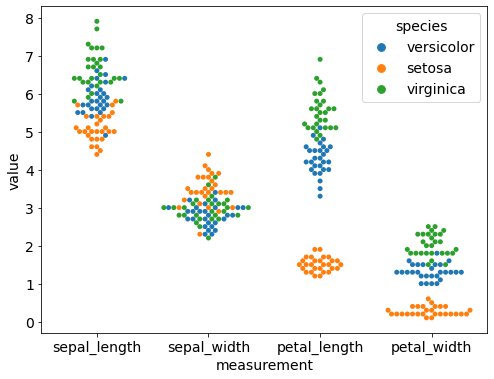

In [11]:
# Swarmplot of iris_melt dataframe 

plt.figure(figsize=(8,6))
plt.rc('font', size=14)
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="species",
    data=iris_melt,
)
plt.show()

Takeaways:
   - The most separation is between species is petal_length and petal_width
   - could petal and sepal area be useful features?
   - virginica iris have the largest petals
   - setosa iris have the smallest petals
   - setosa seem to have wide and short sepals

In [12]:
# 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

   # - sepal_length x sepal_width
   # - petal_length x petal_width
   # - sepal_area x petal_area
   # - sepal_length x petal_length
    
    #What are your takeaways?
    

In [13]:
#create new column for sepal area and petal area
iris_train['sepal_area']= iris_train['sepal_length'] * iris_train['sepal_width']
iris_train['petal_area']= iris_train['petal_length'] * iris_train['petal_width']

In [14]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,1,0,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,0,0,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,0,1,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,1,0,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,0,0,21.66,0.51


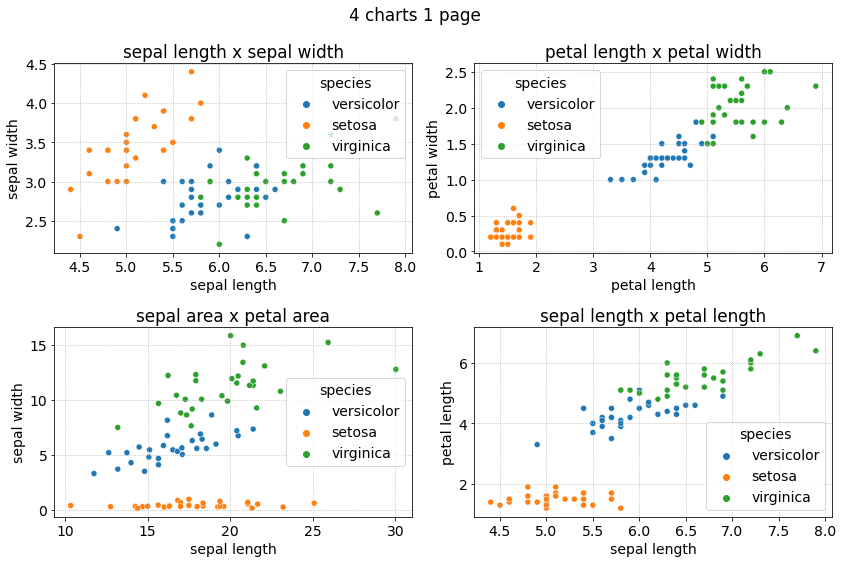

In [15]:
#Answer
fig = plt.figure(figsize = (12, 8))
plt.suptitle('4 charts 1 page')


plt.subplot(2,2,1)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_train)



plt.subplot(2, 2, 2)
plt.title('petal length x petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_train)


plt.subplot(2, 2, 3)
plt.title('sepal area x petal area')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_area', y='petal_area', hue='species', data=iris_train)



plt.subplot(2,2,4)
plt.title('sepal length x petal length')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris_train)

plt.subplots_adjust(left=None, 
                 bottom=0.1, 
                right=None, 
                top=None, 
                wspace=None,
                hspace=None)

plt.tight_layout()

plt.show()

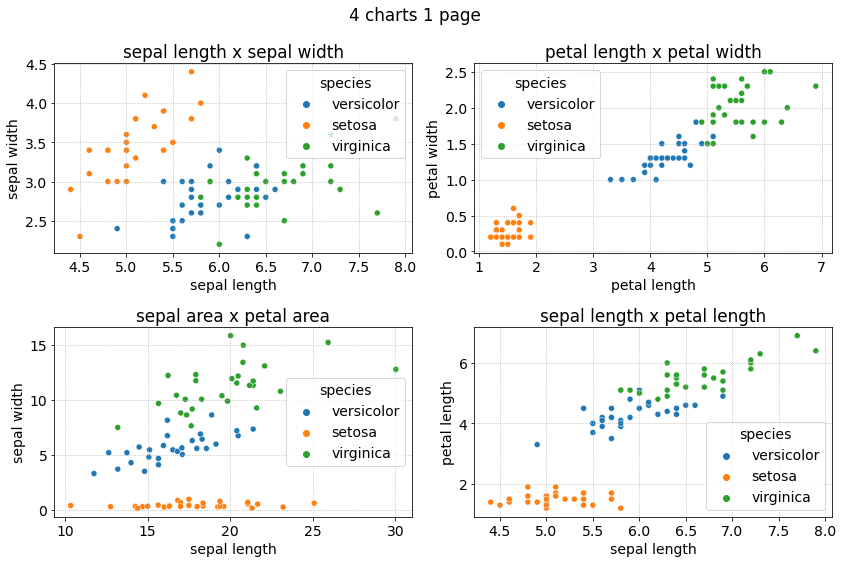

In [16]:
#Another solution

fig = plt.figure(figsize = (12, 8))
plt.suptitle('4 charts 1 page')

x1 = iris_train['sepal_length']
y1 = iris_train['sepal_width']

x2 = iris_train['petal_length']
y2 = iris_train['petal_width']

x3 = iris_train['sepal_area']
y3 = iris_train['petal_area']

x4 = iris_train['sepal_length']
y4 = iris_train['petal_length']



plt.subplot(2,2,1)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x= x1, y= y1, hue='species', data=iris_train)



plt.subplot(2, 2, 2)
plt.title('petal length x petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True, ls = ':')
sns.scatterplot(x= x2, y= y2, hue='species', data=iris_train)


plt.subplot(2, 2, 3)
plt.title('sepal area x petal area')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x= x3, y= y3, hue='species', data=iris_train)



plt.subplot(2,2,4)
plt.title('sepal length x petal length')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.grid(True, ls = ':')
sns.scatterplot(x= x4, y= y4, hue='species', data=iris_train)

plt.subplots_adjust(left=None, 
                 bottom=0.1, 
                right=None, 
                top=None, 
                wspace=None,
                hspace=None)

plt.tight_layout()

plt.show()

In [17]:
#4. Create a heatmap of each variable layering correlation coefficient on top.

In [18]:
iris_train.corr() # correlation table

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.024224,0.698093,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,-0.442075,-0.181364,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.205008,0.723386,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.104650,0.773058,0.299920,0.982404
versicolor,0.024224,-0.442075,0.205008,0.104650,1.000000,-0.500000,-0.320752,-0.015033
virginica,0.698093,-0.181364,0.723386,0.773058,-0.500000,1.000000,0.372955,0.831575
sepal_area,0.619853,0.673554,0.271618,0.299920,-0.320752,0.372955,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,-0.015033,0.831575,0.373870,1.000000


<AxesSubplot:>

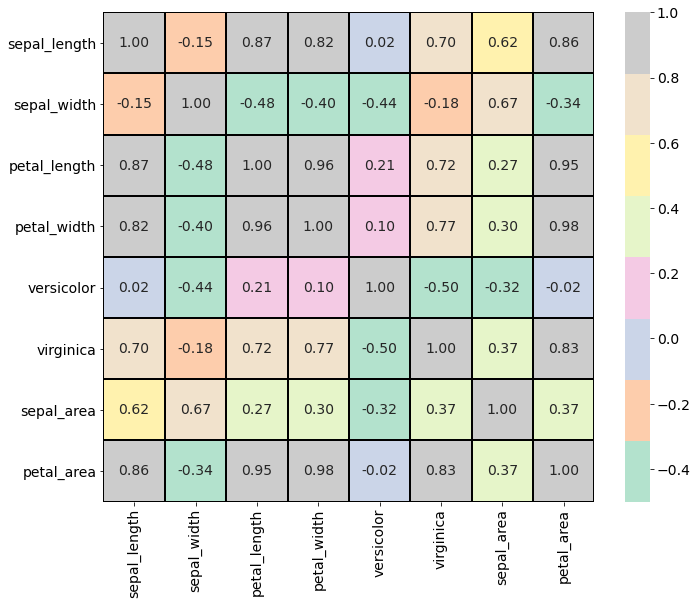

In [19]:
# Heatmap using seaborn
sns.heatmap(iris_train.corr(), cmap= 'Pastel2',  linewidth= 1, linecolor= 'k', annot= True, fmt='.2f')

In [20]:
# 5. Create a scatter matrix visualizing the interaction of each variable.

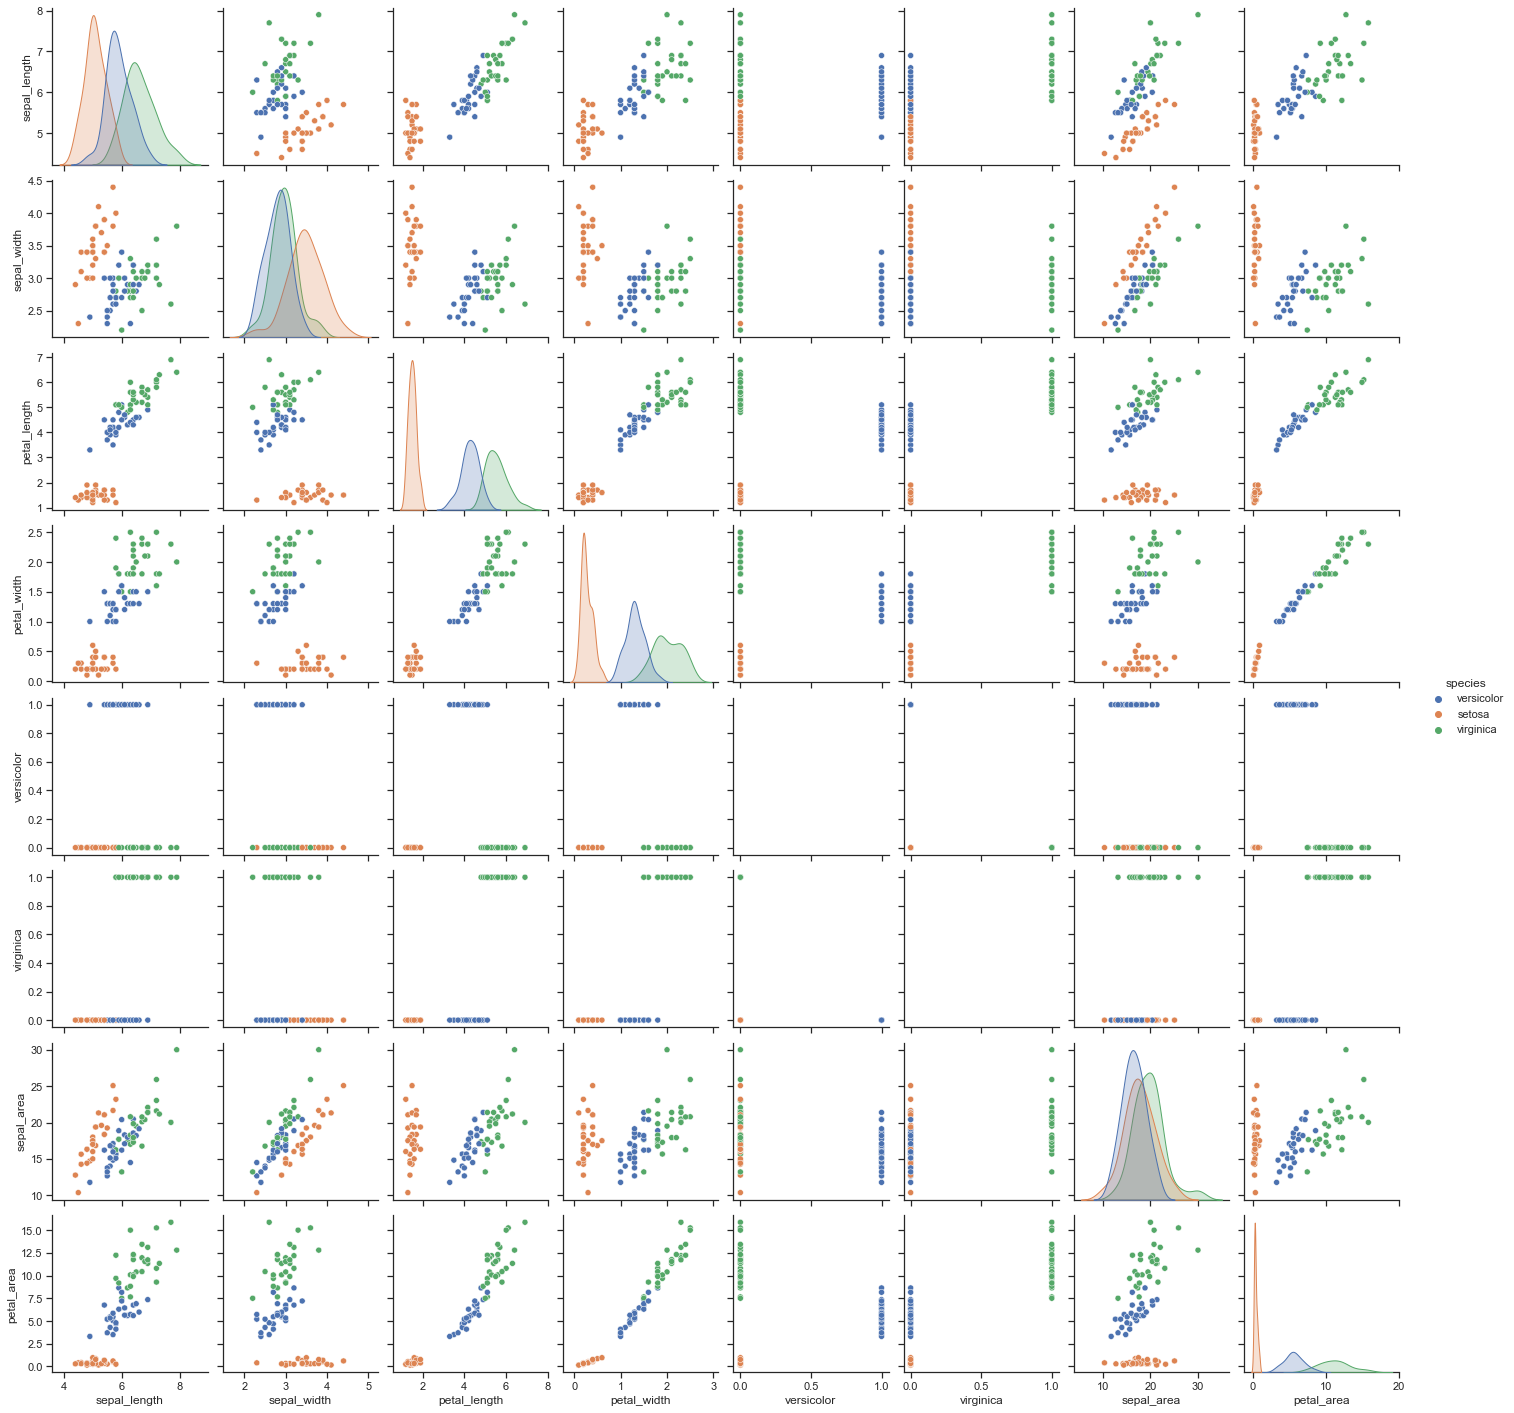

In [69]:
# scatter matrix using seaborn, default theme

df = iris_train
sns.pairplot(df, hue="species")

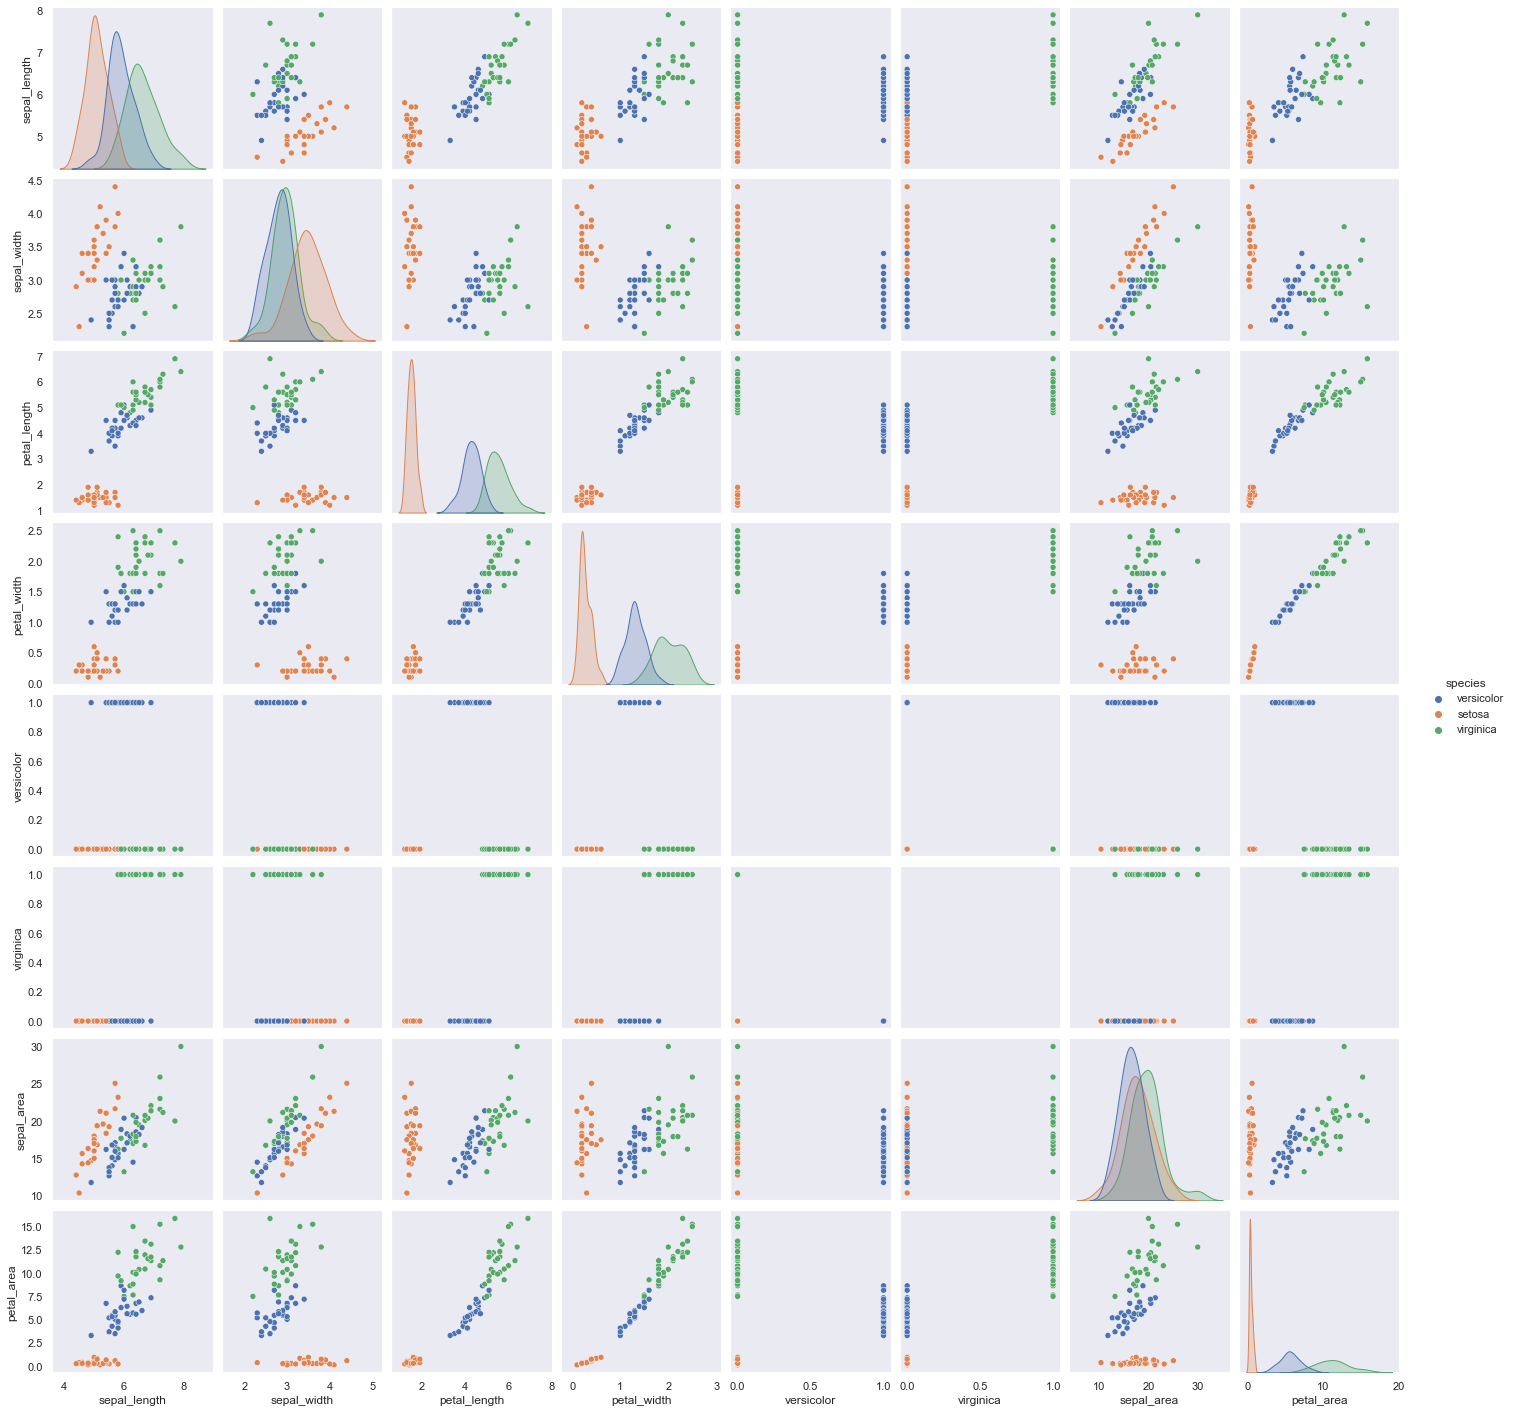

In [70]:
#Scatter matrix with seaborn with theme set
sns.set_theme(style="dark")

df = iris_train
sns.pairplot(df, hue="species")

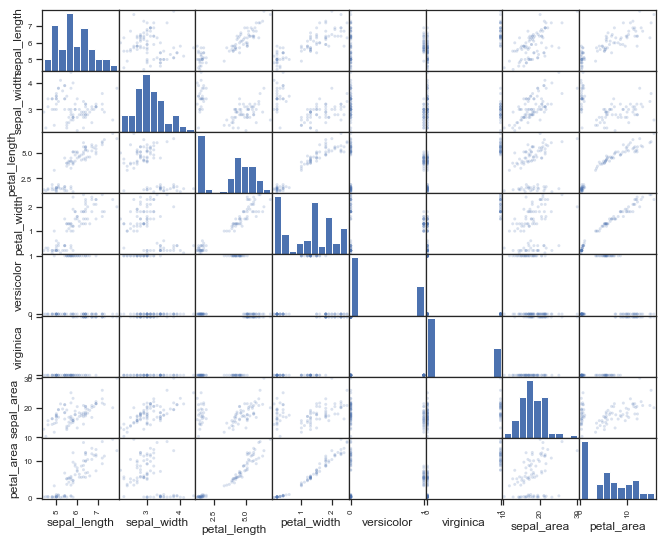

In [26]:
#another solution for scatter matrix
df_IT = iris_train
df_scattermatrix= pd.plotting.scatter_matrix(df_IT, alpha=0.2)


## Takeaways

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine.
- petal area seems to show the largest separation between virginica & versicolor of all the individual features.
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
- virginica and versicolor show little to no difference when it comes to the width of the sepals.

In [33]:
#6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

 Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
- $H_{0}$: No difference in sepal length for virginica vs versicolor.  
- $H_{a}$: There is a difference between sepal length for virginica vs versicolor.
    

In [34]:
x= iris_train[iris_train.species == 'virginica'].sepal_length.dropna()
y= iris_train[iris_train.species == 'versicolor'].sepal_length.dropna()

In [35]:
t,p = stats.ttest_ind(x, y, equal_var= False)

t, p

(5.656491804882077, 6.856736413800083e-07)

In [36]:
#What is your takeaway from this statistical testing?
 
alpha= 0.05

if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


## Takeways:
- There is a larger difference than noticed initially.
- sepal length is a useful feature

In [37]:
#7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [38]:
sa = iris_train['sepal_area'][iris_train['species']!='setosa'] #sepal_area where species is NOT setosa
pa = iris_train['petal_area'][iris_train['species']!='setosa'] #petal_area where species is NOT setosa
vs = iris_train['species'][iris_train['species']!='setosa'] # species name where species is NOT setosa

In [39]:
sa.head()

79     14.82
133    17.64
95     17.10
139    21.39
115    20.48
Name: sepal_area, dtype: float64

In [40]:
pa.head()

79      3.50
133     7.65
95      5.04
139    11.34
115    12.19
Name: petal_area, dtype: float64

In [41]:
vs.head()

79     versicolor
133     virginica
95     versicolor
139     virginica
115     virginica
Name: species, dtype: object

In [42]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,1,0,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,0,0,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,0,1,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,1,0,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,0,0,21.66,0.51


<AxesSubplot:xlabel='species', ylabel='sepal_area'>

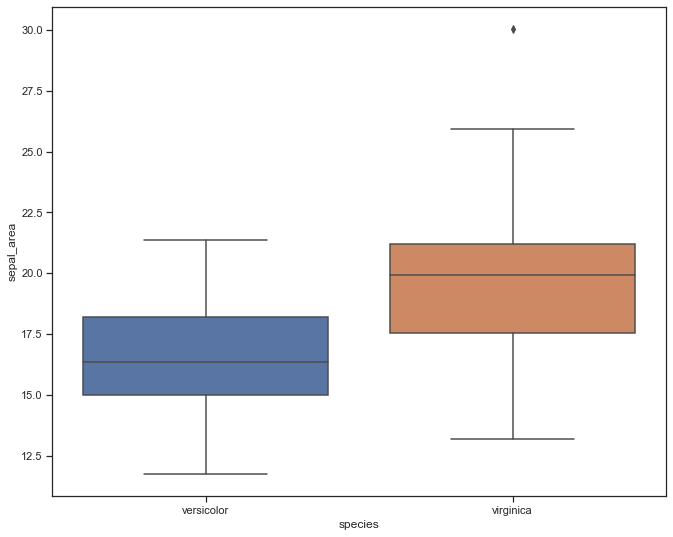

In [43]:
#boxplot of species name with sepal area
sns.boxplot(x=vs, y=sa,)

<AxesSubplot:xlabel='species', ylabel='petal_area'>

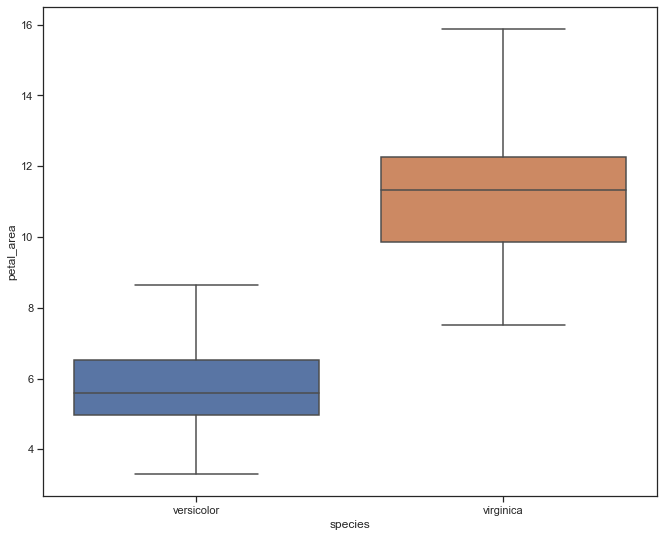

In [44]:
#boxplot of species name with petal area
sns.boxplot(x=vs, y=pa)

In [ ]:
# x and y variables already ran above, only here for reference

# x= iris_train[iris_train.species == 'virginica'].sepal_length.dropna()
# y= iris_train[iris_train.species == 'versicolor'].sepal_length.dropna()

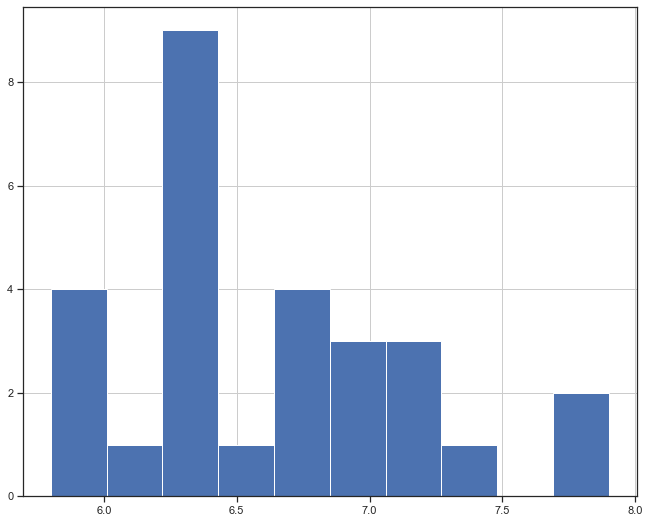

In [45]:
#Histogram of only virginica's sepal_length
x.hist()
plt.show()

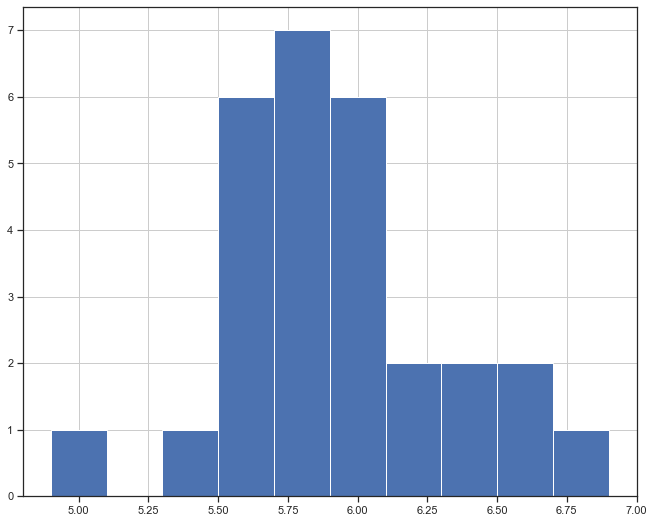

In [46]:
#Histogram of only versicolor's sepal_length
y.hist()
plt.show()

In [47]:
# Statistics of virginica's sepal_length
x.describe()

count    28.000000
mean      6.625000
std       0.532378
min       5.800000
25%       6.300000
50%       6.450000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64

In [48]:
# Statistics of versicolor's sepal_length
y.describe()

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

In [57]:
# Creating new dataframes to work with
virginica = iris_train[iris_train['species'] == 'virginica'] # only species with virginica
versicolor = iris_train[iris_train['species'] == 'versicolor'] # only species with versicolor

In [73]:
virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,sepal_area,petal_area
133,6.3,2.8,5.1,1.5,virginica,0,1,17.64,7.65
139,6.9,3.1,5.4,2.1,virginica,0,1,21.39,11.34
115,6.4,3.2,5.3,2.3,virginica,0,1,20.48,12.19
145,6.7,3.0,5.2,2.3,virginica,0,1,20.10,11.96
125,7.2,3.2,6.0,1.8,virginica,0,1,23.04,10.80


In [74]:
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,1,0,14.82,3.50
95,5.7,3.0,4.2,1.2,versicolor,1,0,17.10,5.04
91,6.1,3.0,4.6,1.4,versicolor,1,0,18.30,6.44
82,5.8,2.7,3.9,1.2,versicolor,1,0,15.66,4.68
52,6.9,3.1,4.9,1.5,versicolor,1,0,21.39,7.35


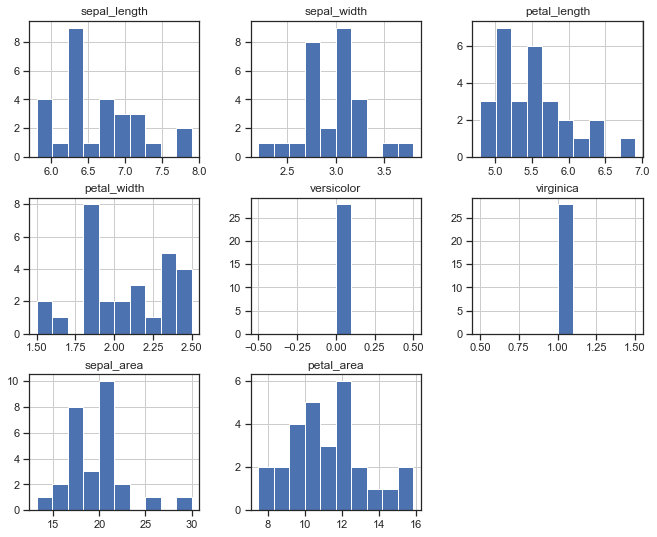

In [58]:
virginica.hist()
plt.show()

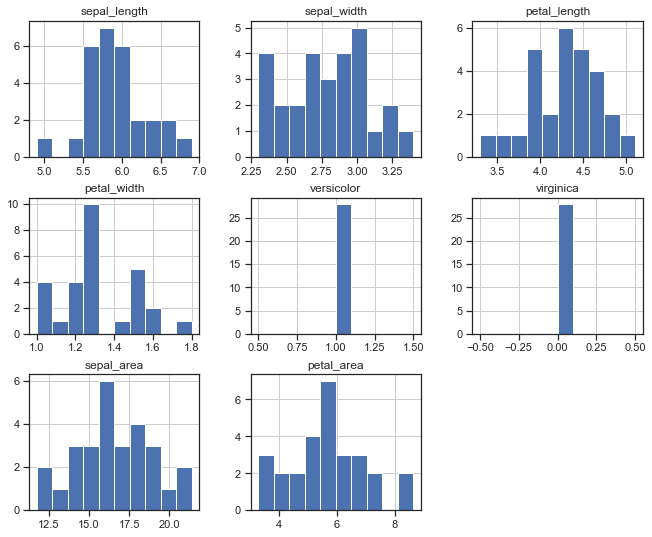

In [59]:
versicolor.hist()
plt.show()

In [60]:
#statistics of versicolor species
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,sepal_area,petal_area
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286,1.0,0.0,16.538929,5.675714
std,0.425556,0.280848,0.409930,0.199470,0.0,0.0,2.411424,1.312604
min,4.900000,2.300000,3.300000,1.000000,1.0,0.0,11.760000,3.300000
25%,5.600000,2.600000,4.000000,1.200000,1.0,0.0,15.015000,4.980000
50%,5.800000,2.800000,4.250000,1.300000,1.0,0.0,16.365000,5.590000
75%,6.125000,3.000000,4.525000,1.500000,1.0,0.0,18.225000,6.517500
max,6.900000,3.400000,5.100000,1.800000,1.0,0.0,21.390000,8.640000


In [61]:
#statistics of versicolor species sepal_length
versicolor.describe()['sepal_length']

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

In [63]:
# Filtering for versicolor species sepal_length's standard deviation only
versicolor.describe()['sepal_length']['std']

0.42555596999441053

In [67]:
#Can do calculations on code above to get variance
#to calculate variance take the standard deviation to the second power
#Here variance is about 0.1811

versicolor.describe()['sepal_length']['std'] **2

0.18109788359788365

In [64]:
#statistics of virginica species
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,sepal_area,petal_area
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429,0.0,1.0,19.695000,11.226786
std,0.532378,0.318956,0.496815,0.293582,0.0,0.0,3.286818,2.131451
min,5.800000,2.200000,4.800000,1.500000,0.0,1.0,13.200000,7.500000
25%,6.300000,2.800000,5.100000,1.800000,0.0,1.0,17.570000,9.847500
50%,6.450000,3.000000,5.500000,2.000000,0.0,1.0,19.930000,11.340000
75%,6.900000,3.100000,5.800000,2.300000,0.0,1.0,21.225000,12.260000
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0,30.020000,15.870000


In [65]:
#statistics of virginica species sepal_length
virginica.describe()['sepal_length']

count    28.000000
mean      6.625000
std       0.532378
min       5.800000
25%       6.300000
50%       6.450000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64

In [66]:
# Filtering for virginica species sepal_length's standard deviation only
virginica.describe()['sepal_length']['std']

0.5323776159136727

In [68]:
#Can do calculations on code above to get variance
#to calculate variance take the standard deviation to the second power
#Here variance is about 0.2835

virginica.describe()['sepal_length']['std'] ** 2

0.283425925925926

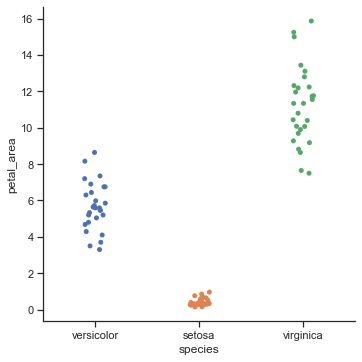

In [50]:
# Categorical plot for iris_train data
sns.catplot(data=iris_train, x='species', y='petal_area', kind='strip')

Note: sns.catplot is a Figure-level interface for drawing categorical plots onto a FacetGrid. This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations

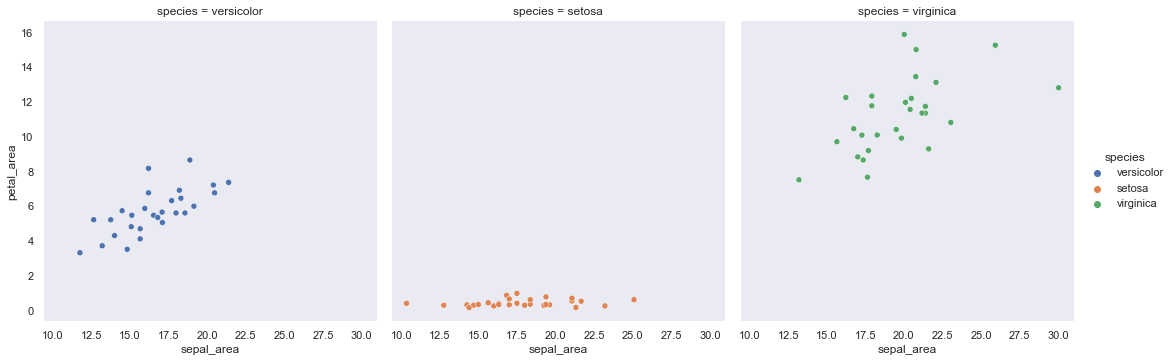

In [75]:
# relplot for iris_train
sns.relplot(data=iris_train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')

Note: sns.relplot is a Figure-level interface for drawing relational plots onto a FacetGrid. This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 